In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Data - Generate using numpy
mean_01 = np.array([1, 0.5])
cov_01 = np.array([[1, 0.1], [0.1, 1.2]])

mean_02 = np.array([4, 5])
cov_02 = np.array([[1.2, 0.1], [0.1, 1.3]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

In [3]:
dist_01.shape

(500, 2)

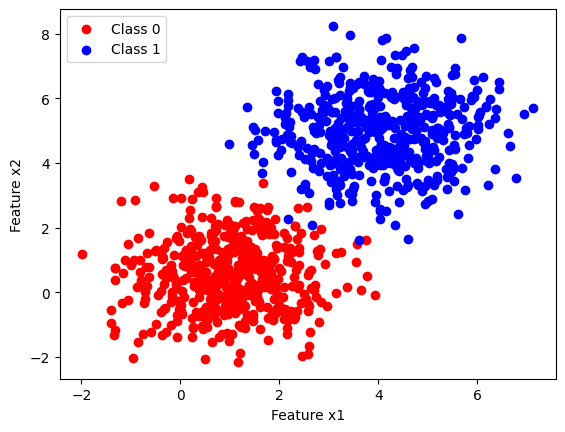

In [4]:
plt.scatter(dist_01[:, 0], dist_01[:, 1], c="red", label="Class 0")
plt.scatter(dist_02[:, 0], dist_02[:, 1], c="blue", label="Class 1")
plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.legend()
plt.show()

In [5]:
data = np.zeros((1000, 3))

In [6]:
data[:500, :2] = dist_01
data[500:, :2] = dist_02

data[500:, -1] = 1.0

In [7]:
#Randomly shuffle the data
np.random.shuffle(data)
print(data[:10])

[[ 0.71860645  2.92428519  0.        ]
 [ 1.68483996  0.62201913  0.        ]
 [ 4.43725084  4.46394595  1.        ]
 [ 0.51059944 -0.83513275  0.        ]
 [ 4.57347781  5.46018896  1.        ]
 [ 1.76281721 -0.80928003  0.        ]
 [ 5.7275204   4.87928178  1.        ]
 [ 5.27819484  5.02213266  1.        ]
 [ 1.25802038  0.91081196  0.        ]
 [ 1.12341951 -0.59153464  0.        ]]


In [8]:
#Divide the data into train and test part
split = int(0.8*data.shape[0])
X_train = data[:split, :-1]
X_test = data[split:, :-1]

Y_train = data[:split, -1]
Y_test = data[split:, -1]

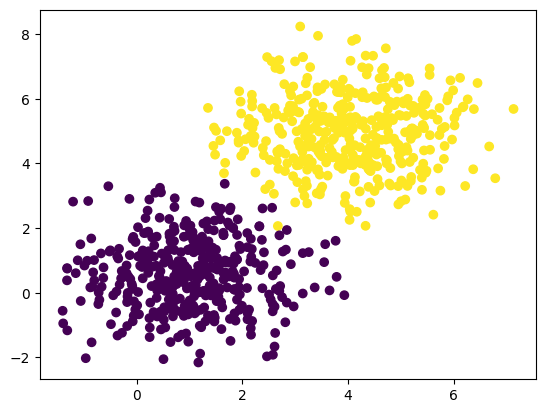

In [9]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train)
plt.show()

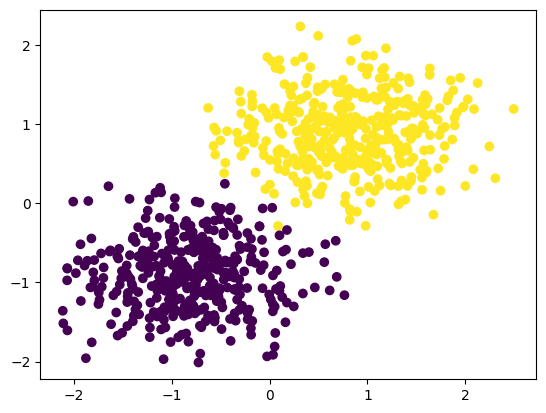

In [10]:
x_mean = X_train.mean(axis=0)
x_std = X_train.std(axis=0)

X_train = (X_train-x_mean)/x_std

X_test = (X_test-x_mean)/x_std

plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train)
plt.show()

In [11]:
#Logistic regression implementation
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))
def hypothesis(X, theta):
    """
    X = entire array (m, n+1)
    theta = np.array(n+1, 1)
    """
    return sigmoid(np.dot(X, theta))
def error(X, y, theta):
    """
    params:
    X = (m, n+1)
    y = (m, 1)
    theta = (n+1, 1)

    return:
        scale_value = loss
    """
    hi = hypothesis(X, theta)
    epsilon = 1e-15
    hi = np.clip(hi, epsilon, 1 - epsilon)  # Prevent log(0)
    e = -1*np.mean((y*np.log(hi) + ((1-y)*np.log(1-hi))))
    return e

In [16]:
def gradient(X, y, theta):
    """
    params:
    X = (m, n+1)
    y = (m, 1)
    theta = (n+1, 1)
    
    return:
        gradient_vector = (n+1, 1)
    """
    hi = hypothesis(X, theta)
    grad = np.dot(X.T, (y-hi))
    m = X.shape[0]
    return grad/m

def gradient_descent(X, y, lr = 0.1, max_itr=500):
    
    n = X.shape[1]
    theta = np.zeros((n, 1))

    error_list = []

    for i in range(max_itr):
        err = error(X, y, theta)
        error_list.append(err)

        grad = gradient(X, y, theta)

        theta = theta + lr*grad
    return (theta, error_list)

In [17]:
ones = np.ones((X_train.shape[0], 1))
X_new_train = np.hstack((ones, X_train))
print(X_new_train.shape)
print(X_new_train)
Y_train = Y_train.reshape((-1, 1))

(800, 3)
[[ 1.         -0.96989711  0.06290554]
 [ 1.         -0.44777823 -0.87748051]
 [ 1.          1.0395286   0.69179701]
 ...
 [ 1.         -0.17735616  1.2910443 ]
 [ 1.          1.46921326  0.57430182]
 [ 1.          2.00063781  0.21756582]]


In [18]:
theta, error_list = gradient_descent(X_new_train, Y_train)

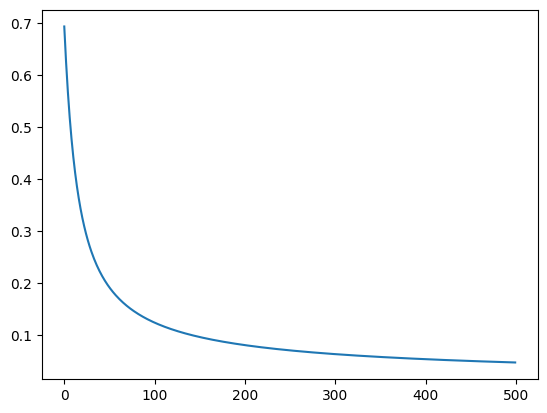

In [19]:
plt.plot(error_list)

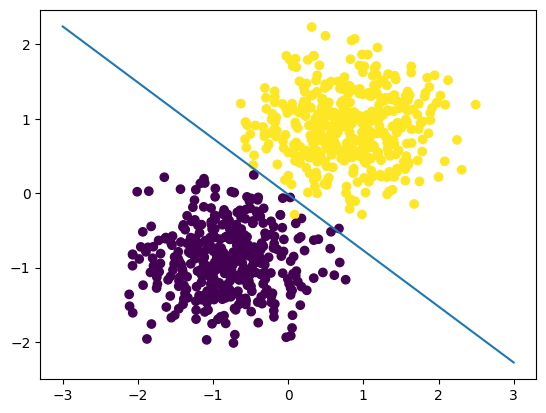

In [20]:
#Visualize Decision surface
x1 = np.arange(-3, 4)
x2 = -(theta[0] + theta[1]*x1)/theta[2]
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train.reshape((-1,)))
plt.plot(x1, x2)
plt.show()

In [21]:
#Predictions and accuracy
X_new_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
print(X_new_test.shape)
print(X_new_test[:3, :])

(200, 3)
[[1.         0.26840637 0.85906192]
 [1.         0.73867622 0.48770212]
 [1.         0.48503773 0.51534317]]


In [22]:
def predict(X, theta):
    h = hypothesis(X, theta)
    output = np.zeros(h.shape)
    output[h>=0.5] = 1
    output = output.astype('int')
    return output

XT_preds = predict(X_new_train, theta)
Xt_preds = predict(X_new_test, theta)

In [25]:
def accuracy(actual, preds):
    actual = actual.astype('int')
    actual = actual.reshape((-1, 1))
    acc = np.sum(actual==preds)/actual.shape[0]
    return acc*100

In [26]:
train_Acc = accuracy(Y_train, XT_preds)
test_acc = accuracy(Y_test, Xt_preds)
print(train_Acc, test_acc)

99.75 99.0
